# Disciplina Tópicos Especiais II (C318)

###### Curso: Fundamentos de Machine Learning
###### Alunas: Luana Gribel, Mariana Helena, Sarah Brandão e Sinara Pimenta
###### Professor: Ricardo Augusto

End-to-End Machine Learning Project - Análise e Modelagem - Dataframe: Diabetes

-------------------------------------------------------------------------------------------------------------------------------

##### Objetivo: Prever se um paciente tem diabetes ou tendência a ter essa doença com bases em alguns dados médicos.

##### Regras de Negócio:
- É possível prever que um indivíduo pode possuir diabetes com base em dados médicos de forma automatizada, sem supervisão profissional?

- Qual o principal sintoma?

- Qual a principal doença recorrente em quem tem diabetes?

- Existe uma tendência maior em algum gênero ou faixa etária?

##### Tipo de problema: Classificação Binária

##### Enquadramento:
Aprendizagem supervisionada, porque a saída é conhecida.

## Importação de dados e bibliotecas

##### Bibliotecas utilizadas no projeto

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import klib
from sklearn.model_selection import StratifiedKFold 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

##### Importação da base de dados

In [2]:
# Especificando diretório para carregamento do arquivo (.csv)
df = pd.read_csv('diabetes.csv')

In [3]:
# Informações sobre o dataframe (atributo info)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

##### Informações sobre o dataset:

Contexto: Dataset obtido a partir da coleta de dados com a aplicação de questionários para os pacientes do Sylhet Diabetes Hospital in Sylhet em Bangladesh.

Atributos:

| Atributo | Descrição | Valores |
|--- |--- |--- |
| Age | Faixa etária abordada na pesquisa | 20-65 |
| Gender | Gênero | Male/Female |
| Polyuria | Termo médico que faz referência ao sintoma de urinar em excesso (acima de 2,5 litros por dia) | Yes/No |
| Polydipsia | Polidipsia é um termo médico que define o sintoma caracterizado por excessiva sensação de sede | Yes/No |
| Sudden weight loss | Perda de peso repentina | Yes/No |
| Weakness | Fraqueza | Yes/No |
| Polyphagia | Polifagia é um sinal médico que significa fome excessiva e ingestão anormalmente alta de sólidos pela boca | Yes/No |
| Genital thrush | (Candidíase) é uma infecção fúngica causada por qualquer tipo do fungo Candida. | Yes/No |
| Visual blurring | Visão turva | Yes/No |
| Itching | Coceira | Yes/No |
| Irritability | Irritabilidade | Yes/No |
| Delayed healing | Cura demorada | Yes/No |
| Partial paresis | Paresia (Diminuição da força muscular)| Yes/No |
| Muscle stiffness | Rigidez muscilar| Yes/No |
| Alopecia | Perda de pelos do corpo | Yes/No |
| Obesity | Obesidade | Yes/No |
| Class | Classificação (Possui ou não diabetes) | Positive/Negative |

## Informações iniciais 

In [4]:
# Descrição estatística do atributo Age
df.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


Conclusão:

In [5]:
# Verificando as variáveis categóricas
generos = df["Gender"].value_counts()
print(generos)
print('----------------------------')
poliuria = df["Polyuria"].value_counts()
print(poliuria)
print('----------------------------')
poliuria = df["Polydipsia"].value_counts()
print(poliuria)
print('----------------------------')
poliuria = df["sudden weight loss"].value_counts()
print(poliuria)
print('----------------------------')
poliuria = df["weakness"].value_counts()
print(poliuria)
print('----------------------------')
poliuria = df["Polyphagia"].value_counts()
print(poliuria)
print('----------------------------')
poliuria = df["Genital thrush"].value_counts()
print(poliuria)
print('----------------------------')
poliuria = df["visual blurring"].value_counts()
print(poliuria)
print('----------------------------')
poliuria = df["Itching"].value_counts()
print(poliuria)
print('----------------------------')
poliuria = df["Irritability"].value_counts()
print(poliuria)
print('----------------------------')
poliuria = df["delayed healing"].value_counts()
print(poliuria)
print('----------------------------')
poliuria = df["partial paresis"].value_counts()
print(poliuria)
print('----------------------------')
poliuria = df["muscle stiffness"].value_counts()
print(poliuria)
print('----------------------------')
poliuria = df["Alopecia"].value_counts()
print(poliuria)
print('----------------------------')
poliuria = df["Obesity"].value_counts()
print(poliuria)

Male      328
Female    192
Name: Gender, dtype: int64
----------------------------
No     262
Yes    258
Name: Polyuria, dtype: int64
----------------------------
No     287
Yes    233
Name: Polydipsia, dtype: int64
----------------------------
No     303
Yes    217
Name: sudden weight loss, dtype: int64
----------------------------
Yes    305
No     215
Name: weakness, dtype: int64
----------------------------
No     283
Yes    237
Name: Polyphagia, dtype: int64
----------------------------
No     404
Yes    116
Name: Genital thrush, dtype: int64
----------------------------
No     287
Yes    233
Name: visual blurring, dtype: int64
----------------------------
No     267
Yes    253
Name: Itching, dtype: int64
----------------------------
No     394
Yes    126
Name: Irritability, dtype: int64
----------------------------
No     281
Yes    239
Name: delayed healing, dtype: int64
----------------------------
No     296
Yes    224
Name: partial paresis, dtype: int64
---------------------

comentar da obesidade

Análise para o classificador não ficar inclinado a uma resposta:

In [6]:
df["class"].value_counts()

Positive    320
Negative    200
Name: class, dtype: int64

Text(0, 0.5, 'Quantidade de pessoas')

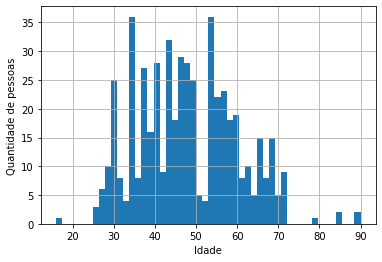

In [7]:
# Histograma plotado em cima da quantidade de pessoas
df['Age'].hist(bins = 50)
plt.xlabel('Idade')
plt.ylabel('Quantidade de pessoas')

In [8]:
# Biblioteca para análise de dados (visualizações estatísticas)
import klib

<AxesSubplot:xlabel='Age', ylabel='Density'>

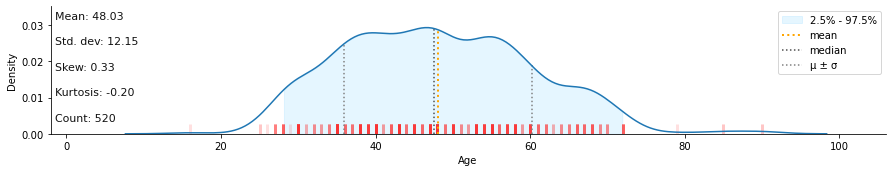

In [9]:
#Dispersão da variável Age
klib.dist_plot(df['Age'])

Análise conduzida a partir do gráfico:

1 - A faixa etária predominante dentre os entrevistados é a de 35 à 60 anos.

<AxesSubplot:xlabel='Age', ylabel='Density'>

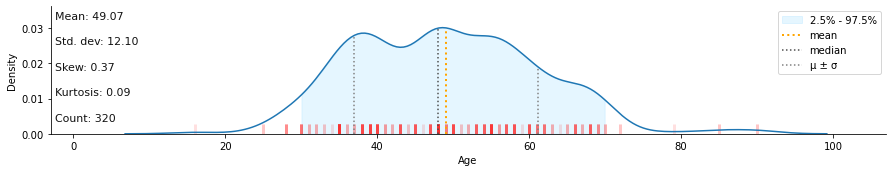

In [10]:
#Dispersão da variável Age, para pessoas que possuem diabetes
df_positive = df[(df['class']=='Positive')]
klib.dist_plot(df_positive['Age'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

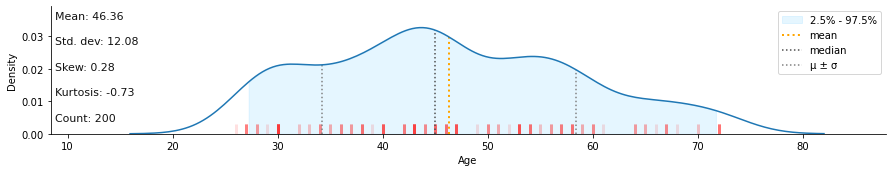

In [11]:
#Dispersão da variável Age, para pessoas que não possuem diabetes
df_negative = df[(df['class']=='Negative')]
klib.dist_plot(df_negative['Age'])

## Preparação dos Dados - Manipulando features categóricas (ordinal encoder)

Com exceção da variável idade ('age'), todas outras são variáveis categóricas.
Portanto, os valores Yes/No, Positive/Negative, Male/Female foram convertidos para 1 e 0.


In [12]:
df = df.replace(['Male','Female','Yes','No','Positive','Negative'],(1,0,1,0,1,0))
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


## Amostragem 

A amostragem é um ponto crítico para um projeto de ML. Ela afeta diretamente na generalização do modelo que será construído.

Essa etapa consistem separar o conjunto de dados de treino e teste.

Dados de treinamento: são usados para treinar o modelo.

Dados de teste: são usados para comprovar que aquele modelo realmente funciona. (Serão apresentados ao modelo após a sua criação, simulando previsões reais que o modelo realizará, permitindo assim que o desempenho do modelo seja verificado.)

O método de amostragem empregada nesse projeto foi a amostragem aleatória simples, usando a função do SciKit Learn train_test_split.
Assim, 20% do conjunto de dados foram reservados para teste e o restante para treino. Essa seleção é feita de forma aleatória, mas com a semente do gerador de número aleatório com o valor em 60 (um valor fixo escolhido pela equipe). De forma que ao executar o código novamente, os conjuntos permaneçam os mesmos.


In [62]:
#%% Método de Amostragem Aleatória Simples (Sklearn)
# Função do scikit-learn train_test_split
train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 60)

In [63]:
print(f"Tamanho conjunto de treino: {len(train_set)}")
print(f"Tamanho conjunto de teste: {len(test_set)}")

Tamanho conjunto de treino: 416
Tamanho conjunto de teste: 104


## Investigando Correlações

Será analisado o dataframe de treino. Objetivo de conhecer o dados e detectar as melhores variáveis para se trabalhar.

Para realizar a análise exploratória dos dados foi utilizado o coeficiente de correlação de Pearson (p).

Esse coeficiente de correlação assume valores de -1 a 1, medindo apenas correlações lineares. 

Quando o coeficiente está próximo de 1, significa que existe uma forte correlação positiva. 

Quando o coeficiente está próximo de -1, significa que existe uma forte correlação negativa. 

Finalmente, coeficientes próximos de 0 significam que não há correlação linear.



In [64]:
#Correlação das variáveis do dataframe
correlation_matrix = train_set.corr(method='pearson')

<AxesSubplot:>

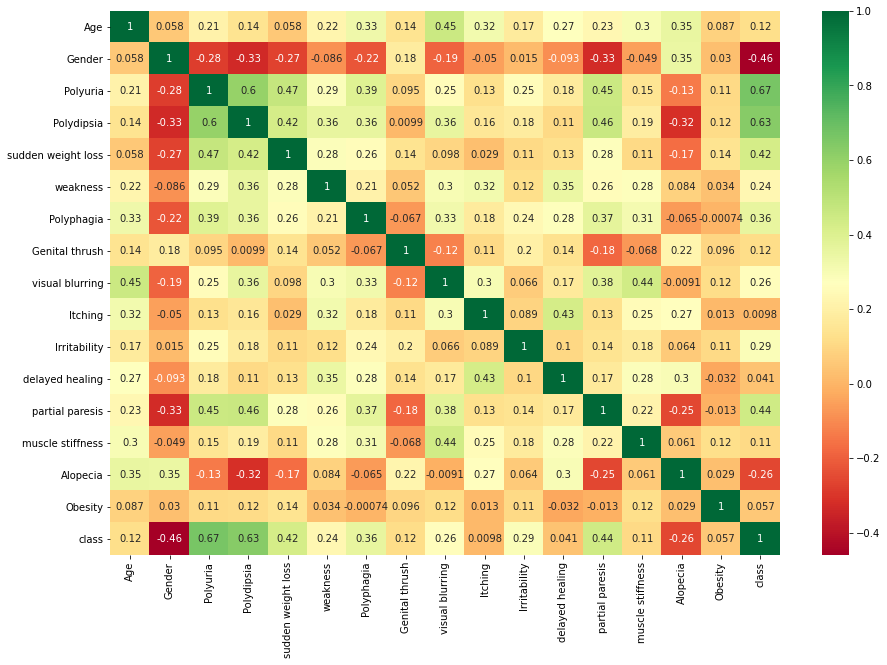

In [65]:
plt.figure(figsize=(15,10))
top_corr_features = correlation_matrix.index
sns.heatmap(correlation_matrix[top_corr_features],annot=True,cmap="RdYlGn")

In [ ]:
Aqui está a matriz de correlação para nosso conjunto de treino. Então temos a correlação de cada variável com todos outras.

Podemos desconsiderar a diagonal principal, porque é a correlação da variável com ela mesma, por isso igual a 1.

<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

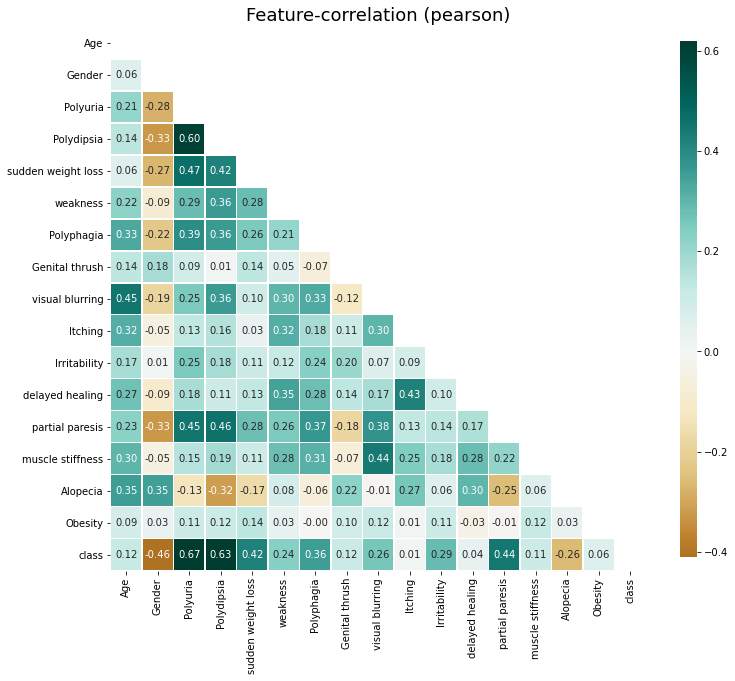

In [66]:
klib.corr_plot(train_set)

In [ ]:
Nessa outra imagem, temos uma versão simplificada da matriz de correlação, eliminando valores duplicados* e a diagonal principal.

*Exemplo: Correlação entre Idade e Gênero e a correlação entre Gênero e Idade.

<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

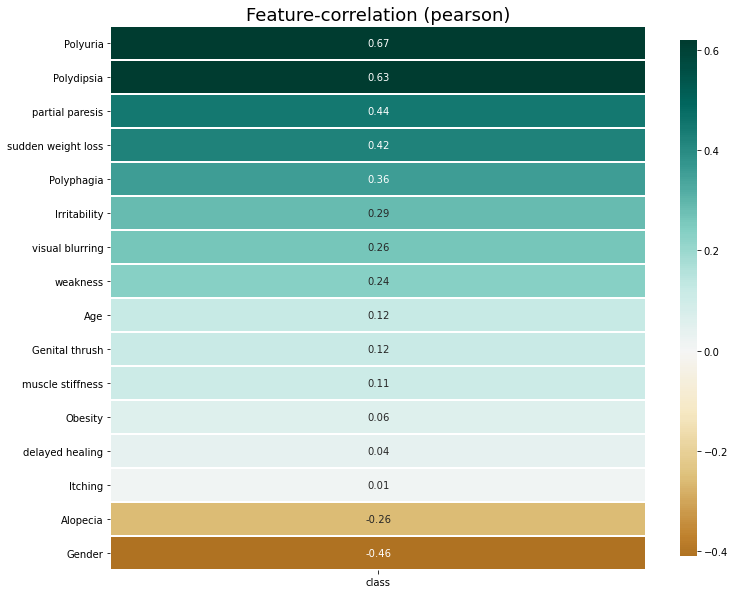

In [67]:
klib.corr_plot(train_set, target='class')

In [ ]:
Mas o foco é a relação de uma variável de entrada com a variável de saída. 

Então vamos analisar essa outra imagem, onde é exibido apenas essas correlações.

Aqui a correlação está ordenada, facilitando a visualização.

Podemos perceber que Poliúria e Polidipsia possuem uma correlação positiva relativamente alta. 

Assim, esses sintomas são mais presentes em pessoas com diabetes.

A parecia parcial e a perda de peso repentino também possuem valores significativos, mas menores em valor absoluto. 

Se assemelhando com a correlação de gênero e classe (que é a nossa variável alvo). 

Mas o gênero tem uma correlação negativa. Então as mulheres têm uma tendência maior a doença.

Um dado interessante é que a obesidade possui correlação praticamente nula. 
Mas conforme os órgãos de saúde, embora haja um componente hereditário importante, superior ao do diabetes do tipo 1, 
o ganho de peso, associado ao sedentarismo guardam estreita relação com o aparecimento da diabetes tipo 2.
Estima-se que 60% a 90% dos portadores da diabetes tipo 2 sejam obesos e a incidência é maior após os 40 anos (SBD).
Assim, sabemos que a relação da classe com a obesidade não é uma relação linear, 
mas podemos supor que elas possuam uma relação forte de outro tipo.

O mesmo ocorre com a variável idade, que possui relação linear fraca (0,12).
Mas conforme citado, existe uma tendência maior do indivíduo desenvolver diabetes depois dos 40. 
Deste modo, podemos supor que idade e 'class' têm uma relação forte de outro tipo.


| Feature | p | Correlação linear |
|--- |--- |--- |
| Age | 0.12 | Muito Baixa |
| Gender | -0.46 | Intermediária |
| Polyuria | 0.67 | Relativamente Alta |
| Polydipsia | 0.63 | Relativamente Alta |
| Sudden weight loss | 0.42 | Intermediária |
| Weakness | 0.24 | Baixa |
| Polyphagia | 0.36 | Baixa |
| Genital thrush | 0.12 |Muito Baixa |
| Visual blurring | 0.26 | Baixa |
| Itching | 0.01 | Praticamente nula |
| Irritability | 0.29 | Baixa |
| Delayed healing | 0.04 | Praticamente nula |
| Partial paresis | 0.44 | Intermediária |
| Muscle stiffness | 0.11| Muito Baixa |
| Alopecia | -0.26 | Baixa |
| Obesity | 0.06 | Praticamente nula |


### Modelagem

Um classificador random forest pode ser utilizado para computar a importância das features.

In [68]:
X_train = train_set.iloc[:, 0:16].to_numpy()

y_train = train_set.loc[:, 'class'].to_numpy()

In [69]:
feature_names = [f"feature {i}" for i in range(X_train.shape[1])]
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train, y_train)

RandomForestClassifier()

In [70]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

In [71]:
importances

array([0.10618607, 0.11231568, 0.23249334, 0.17097889, 0.04279714,
       0.01940807, 0.03408701, 0.02426281, 0.02819324, 0.02671147,
       0.03578075, 0.03362077, 0.05323156, 0.02590079, 0.03143113,
       0.0226013 ])

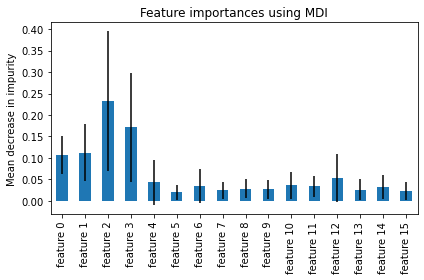

In [72]:
import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [73]:
#X_test
X_test = test_set.iloc[:, 0:16].to_numpy()
#Y_test
y_test = test_set.loc[:, 'class'].to_numpy()
#Train the model using the training sets  
var = forest.fit(X_train,y_train) 
y_pred=forest.predict(X_test)

In [74]:
array_test = var.predict_proba(X_test)

In [75]:
df_with_array_test = pd.DataFrame(array_test,columns=['%NaoTer','%Ter'])

In [76]:
df_with_array_test

,%NaoTer,%Ter
0,0.20,0.80
1,0.00,1.00
2,0.88,0.12
3,0.04,0.96
4,0.04,0.96
...,...,...
99,0.03,0.97
100,0.15,0.85
101,0.00,1.00
102,0.00,1.00


### Avaliação de Desempenho

Avaliação de desempenho com todos os dados (sem separação de treino e teste)

In [77]:
#y_train_positive = df[(df['class']=='Negative')]
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.09805806756909202

### Validação com Confusion Matrix

In [80]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

In [81]:
confusion_matrix(y_test, y_pred)

array([[36,  0],
       [ 1, 67]], dtype=int64)

In [82]:
tn

36

In [83]:
fp

0

In [84]:
fn

1

In [85]:
tp

67